K-Means and Silhouette Analysis for Clustering

For any NBA player, the number of points he scored per game is arguably the most significant contribution he can do for his team in the NBA, even though it is not the only indicator of how valuable a player is for the team. The player's salary is another important factor that represents the value of the player in the market overall. In this project, we investigate whether we can create a segmentation for players based on the points they scored and their corresponding salaries for the 2016-2017 NBA season. We use the K-Means algorithm and Silhouette Analysis in order to do the clustering.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df = pd.read_csv('nba_2016_2017_100.csv')

In [4]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [5]:
df[['PLAYER_NAME','PTS','SALARY_MILLIONS']].describe()

,PTS,SALARY_MILLIONS
count,100.000000,100.000000
mean,15.174200,11.290120
std,7.319374,8.789342
min,1.500000,0.310000
25%,9.225000,2.842500
50%,14.550000,10.820000
75%,20.650000,18.400000
max,31.600000,30.960000


The descriptive statistics are given above. Let's see a scatter plot in order to have a better understanding.

In [6]:
Points=df.iloc[:, [60,59]]['PTS']
Salary=df.iloc[:, [60,59]]['SALARY_MILLIONS']

Text(0, 0.5, 'Salary (in Millions)')

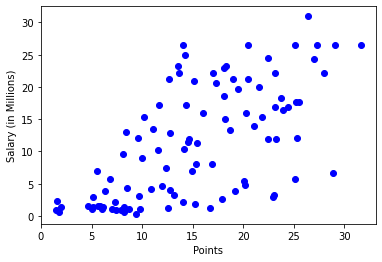

In [7]:
plt.scatter(Points, Salary, color = 'blue')
plt.xlabel('Points')
plt.ylabel('Salary (in Millions)')

K-Means Algorithm

The first step in K-Means algorithm is to determine the number "K" for the optimal number of clusters. We are going to use the Elbow method in order to determine the best "K". 

In [8]:
sse=[] #Sum of Squared Errors
for i in range(1,11):
    kmeans = KMeans(i, init='k-means++', random_state=0)
    kmeans.fit(pd.concat([Points, Salary],axis=1))
    sse.append(kmeans.inertia_)
sse

[12951.750378560006,
 4845.283643489189,
 3301.866045420346,
 2490.425264668067,
 1895.3178593412688,
 1355.4417062514785,
 1075.9820204151404,
 951.4684585680985,
 883.7443716992408,
 760.2699193773448]

Text(0, 0.5, 'Error Sum of Squares')

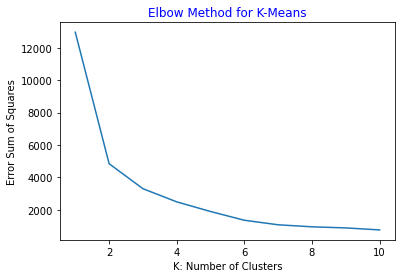

In [9]:
plt.plot(range(1,11), sse, )
plt.title('Elbow Method for K-Means', color = 'blue')
plt.xlabel('K: Number of Clusters')
plt.ylabel('Error Sum of Squares')

The idea behind the Elbow Method is to choose the k value at which the Sum of Squared Errors decreases abruptly. In other words, we consider the "joints" in the graph that resemble an elbow shape. Based on this graph, an ideal number of K can be 2 or maybe 3. We will investigate both of them.

Two Clusters

In [10]:
Model = KMeans(2, init='k-means++')
k_means= Model.fit_predict(pd.concat([Points, Salary],axis=1))
X=pd.concat([Points, Salary],axis=1)

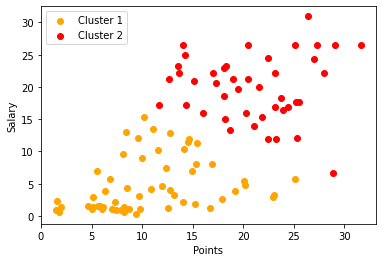

In [11]:
plt.scatter(X[k_means == 0]['PTS'], X[k_means == 0]['SALARY_MILLIONS'], c = 'orange', label = 'Cluster 1')
plt.scatter(X[k_means == 1]['PTS'], X[k_means == 1]['SALARY_MILLIONS'], c = 'red', label = 'Cluster 2')
plt.xlabel('Points')
plt.ylabel('Salary')
plt.legend()

Three Clusters

In [12]:
Model = KMeans(3, init='k-means++')
k_means= Model.fit_predict(pd.concat([Points, Salary],axis=1))
X=pd.concat([Points, Salary],axis=1)

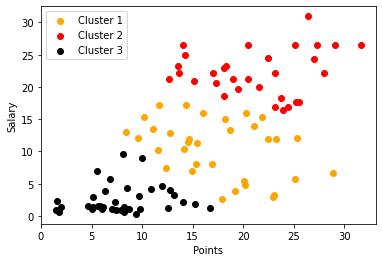

In [13]:
plt.scatter(X[k_means == 0]['PTS'], X[k_means == 0]['SALARY_MILLIONS'], c = 'orange', label = 'Cluster 1')
plt.scatter(X[k_means == 1]['PTS'], X[k_means == 1]['SALARY_MILLIONS'], c = 'red', label = 'Cluster 2')
plt.scatter(X[k_means == 2]['PTS'], X[k_means == 2]['SALARY_MILLIONS'], c = 'black', label = 'Cluster 3')
plt.xlabel('Points')
plt.ylabel('Salary')
plt.legend()

When the joint is not very obvious in the Elbow Method, it is better to do Silhouette analysis.

Silhouette Analysis

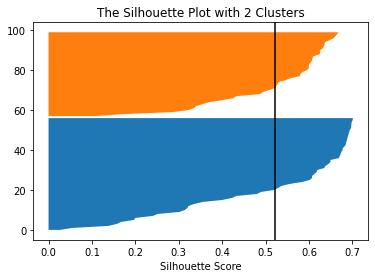

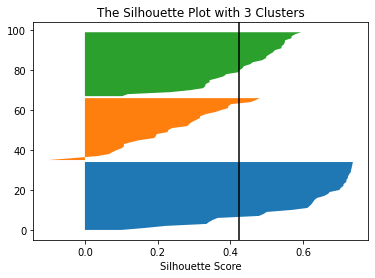

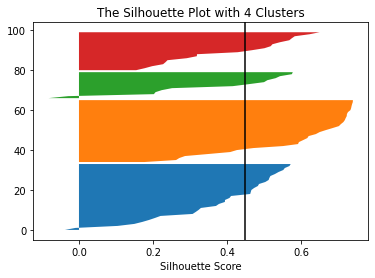

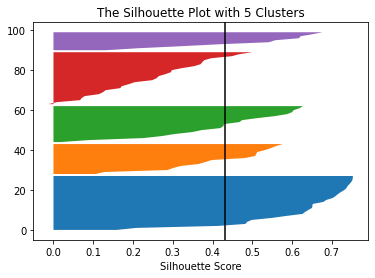

In [15]:
X=pd.concat([Points, Salary],axis=1)

for num in range(2,6):
    Model = KMeans(num, init='k-means++')
    kmeans = Model.fit_predict(X)
    score = silhouette_score(X, kmeans)
    values = silhouette_samples(X, kmeans)
    fig = plt.subplots()
    minimum = 0
    for i in range(num):
        SVI = \
            values[kmeans == i] #Silhouette Value of the current number of clusters
        SVI.sort()
        length = SVI.shape[0]
        maximum = minimum + length
        plt.fill_betweenx(np.arange(minimum, maximum), SVI)
        minimum = maximum
    plt.title("The Silhouette Plot with "+str(num)+" Clusters")
    plt.xlabel("Silhouette Score")
    plt.axvline(x=score,color="black")
plt.show()

In [16]:
for num in range(2,6):
    Model = KMeans(num, init='k-means++')
    kmeans = Model.fit_predict(X)
    print("For "+str(num)+" clusters, the average Silhouette values is equal to", round(silhouette_score(X, kmeans),2))

For 2 clusters, the average Silhouette values is equal to 0.52
For 3 clusters, the average Silhouette values is equal to 0.42
For 4 clusters, the average Silhouette values is equal to 0.44
For 5 clusters, the average Silhouette values is equal to 0.43


From these plots and Silhouette scores, we can conclude the number of clusters should be 2.